# Astropy tables: columns and units

In [1]:
import numpy as np
import astropy.units as u
from astropy.table import Table, QTable
from astropy.coordinates import SkyCoord, Angle
import matplotlib.pyplot as plt

⚠️ `Tables` with units have limited functionality. For full unit management, it is recommended to use `QTable`.

In [2]:
a = np.array([1, 4, 5], dtype=np.int32)
b = [2.0, 5.0, 8.5] * u.cm
c = ['x', 'y', 'z']
d = [10, 20, 30] * u.m / u.s

t = QTable([a, b, c, d],
           names=('id', 'length', 'label', 'velocity'),
           meta={'name': 'first table'})

In [3]:
t

id,length,label,velocity
,cm,,m / s
int32,float64,str1,float64
1,2.0,x,10.0
4,5.0,y,20.0
5,8.5,z,30.0


In [4]:
t['velocity']

<Quantity [10., 20., 30.] m / s>

In [5]:
t['velocity'][1]

<Quantity 20. m / s>

In [6]:
t['velocity'][0:2]

<Quantity [10., 20.] m / s>

In [7]:
t[2]

id,length,label,velocity
,cm,,m / s
int32,float64,str1,float64
5,8.5,z,30.0


In [8]:
t['velocity'].unit

Unit("m / s")

## Obtaining information and statistics

In [9]:
t.info

<QTable length=3>
  name    dtype   unit  class  
-------- ------- ----- --------
      id   int32         Column
  length float64    cm Quantity
   label    str1         Column
velocity float64 m / s Quantity

In [10]:
t.info('stats')

<QTable length=3>
  name      mean         std        min      max   
-------- ---------- ------------- -------- --------
      id    3.33333       1.69967        1        5
  length 5.16667 cm    2.65623 cm     2 cm   8.5 cm
   label         --            --       --       --
velocity   20 m / s 8.16497 m / s 10 m / s 30 m / s


In [11]:
stats = t.info('stats', out=None)
stats

name,mean,std,min,max,n_bad,length
str8,str10,str13,str8,str8,int64,int64
id,3.33333,1.69967,1,5,0,3
length,5.16667 cm,2.65623 cm,2 cm,8.5 cm,0,3
label,--,--,--,--,0,3
velocity,20 m / s,8.16497 m / s,10 m / s,30 m / s,0,3


In [12]:
stats[3]['mean']

'20 m / s'

## Time and coordinates

In [13]:
from astropy.time import Time
from astropy.coordinates import SkyCoord

Time.FORMATS

OrderedDict([('jd', astropy.time.formats.TimeJD),
             ('mjd', astropy.time.formats.TimeMJD),
             ('decimalyear', astropy.time.formats.TimeDecimalYear),
             ('unix', astropy.time.formats.TimeUnix),
             ('unix_tai', astropy.time.formats.TimeUnixTai),
             ('cxcsec', astropy.time.formats.TimeCxcSec),
             ('gps', astropy.time.formats.TimeGPS),
             ('plot_date', astropy.time.formats.TimePlotDate),
             ('stardate', astropy.time.formats.TimeStardate),
             ('datetime', astropy.time.formats.TimeDatetime),
             ('ymdhms', astropy.time.formats.TimeYMDHMS),
             ('iso', astropy.time.formats.TimeISO),
             ('isot', astropy.time.formats.TimeISOT),
             ('yday', astropy.time.formats.TimeYearDayTime),
             ('datetime64', astropy.time.formats.TimeDatetime64),
             ('fits', astropy.time.formats.TimeFITS),
             ('byear', astropy.time.formats.TimeBesselianEpoch),
        

In [14]:
mjd = Time([56200.25, 56400.33, 57500.66], format='mjd', scale='utc')
date = mjd.to_datetime()
sc = SkyCoord([10, 20, 30], [-45, +40, +55], unit='deg')
tab = QTable([mjd, date,  sc, sc.to_string('hmsdms')], names=['MJD', 'Date', 'skycoord', 'coord'])
tab

MJD,Date,skycoord,coord
,,"deg,deg",
Time,object,SkyCoord,str20
56200.25,2012-09-30 06:00:00,"10.0,-45.0",00h40m00s -45d00m00s
56400.33,2013-04-18 07:55:12,"20.0,40.0",01h20m00s +40d00m00s
57500.66,2016-04-22 15:50:24,"30.0,55.0",02h00m00s +55d00m00s


In [15]:
tab['coord']

00h40m00s -45d00m00s
01h20m00s +40d00m00s
02h00m00s +55d00m00s


## Managing table columns

In [16]:
tab.columns

<TableColumns names=('MJD','Date','skycoord','coord')>

In [17]:
tab.colnames

['MJD', 'Date', 'skycoord', 'coord']

Substitute column

In [18]:
tab['MJD'] = [50000, 60000, 70000]
tab

MJD,Date,skycoord,coord
,,"deg,deg",
int64,object,SkyCoord,str20
50000,2012-09-30 06:00:00,"10.0,-45.0",00h40m00s -45d00m00s
60000,2013-04-18 07:55:12,"20.0,40.0",01h20m00s +40d00m00s
70000,2016-04-22 15:50:24,"30.0,55.0",02h00m00s +55d00m00s


Create new column

In [19]:
tab['x'] = [1,2,3]
tab['y'] = [10,20,30]
tab

MJD,Date,skycoord,coord,x,y
,,"deg,deg",,,
int64,object,SkyCoord,str20,int64,int64
50000,2012-09-30 06:00:00,"10.0,-45.0",00h40m00s -45d00m00s,1,10
60000,2013-04-18 07:55:12,"20.0,40.0",01h20m00s +40d00m00s,2,20
70000,2016-04-22 15:50:24,"30.0,55.0",02h00m00s +55d00m00s,3,30


In [20]:
tab['z'] = tab['x']*2 + tab['y']
tab

MJD,Date,skycoord,coord,x,y,z
,,"deg,deg",,,,
int64,object,SkyCoord,str20,int64,int64,int64
50000,2012-09-30 06:00:00,"10.0,-45.0",00h40m00s -45d00m00s,1,10,12
60000,2013-04-18 07:55:12,"20.0,40.0",01h20m00s +40d00m00s,2,20,24
70000,2016-04-22 15:50:24,"30.0,55.0",02h00m00s +55d00m00s,3,30,36


Selection of relevant columns

In [21]:
tab['x']

1
2
3


In [22]:
type(tab['x'])

astropy.table.column.Column

In [23]:
tab['x'].data

array([1, 2, 3])

In [24]:
tab['x'].mean()


2.0

In [25]:
tab[['MJD', 'x', 'z']]


MJD,x,z
int64,int64,int64
50000,1,12
60000,2,24
70000,3,36


In [26]:
my_columns = ['x', 'y', 'z']
tab[my_columns]

x,y,z
int64,int64,int64
1,10,12
2,20,24
3,30,36


## Load our problem data from last session

In [193]:
data0 = Table.read('../session_01/data0.ecsv')

### ⛏ Exercise
- Print the first 5 rows of the table with `data0[0:5]`.
- Obtain a list of columns of the table `data0`.
- Create a new table `my_table` containing only the columns Right Ascension, Declination, and the two proper motions, and the associated errors for all of them. You should obtain a table with 8 columns.
- Obtain the description (column name, format, units and description) using .info() method.
- Print the mean R.A. in degress and the median Declination in degrees.
- Print the standard deviation (`np.std`) of the R.A. in arcseconds and of the Declination in arcmin.
- Compute the minimum and maximum proper motion in right ascension in units of mas/yr
- Compute the minimum and maximum proper motion in declination in units of arcmin/day
- Create a new column `pos_error` in `my_table` with the total uncertainty in the position that accounts for the quadratic sum (`np.sqrt(()**2 + ()**2)`) of the uncertainty of the R.A. and Declination components. Express in units of deg.
- Create a new column `pm_error` in `my_table` with the total uncertainty in the position that accounts for the quadratic sum (`np.sqrt(()**2 + ()**2)`) of the uncertainty of the proper motion components in units of arcmin per minute.


In [194]:
data0[0:5]

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object
0.009802111759292364,1635721458409799680,Gaia DR2 661322846442390784,661322846442390784,390503307,2015.5,130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,0.828727295033905,0.3350012064562093,2.473804,-4.033231570564601,0.49627960158587475,2.915715928312259,0.33009256613751603,-0.31987226,-0.044802926,-0.18101314,0.28448436,-0.21131124,0.06778818,-0.43846372,0.5705786,-0.209052,-0.29190946,152,0,143,9,0.2536221,141.57729,0.2887893752683439,0.2976614313509744,31,False,0.41604915,1.4433653233017025,0.055630092831848624,0.0069499817,18,11,0.4772171,0,24,False,196,667.7619710548339,2.35694090385261,283.31723,18.626812,21,277.9334255388577,10.65346573347537,26.088545,19.241537,22,720.0270197973655,14.947795683432332,48.169445,17.618547,1.4944853,0,1.6229897,0.6147251,1.0082645,--,--,0,--,--,--,NOT_AVAILABLE,205.53752569203553,32.51753674558407,127.19356700248548,1.5582862225577503,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661322846442390784
0.013413931870679088,1635721458409799680,Gaia DR2 661322953818940160,661322953818940160,350513172,2015.5,130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751,0.42735110852786373,0.14423369016443197,2.9629078,-2.6

In [195]:
data0.columns

<TableColumns names=('dist','solution_id','DESIGNATION','source_id','random_index','ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_n_obs_al','astrometric_n_obs_ac','astrometric_n_good_obs_al','astrometric_n_bad_obs_al','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_params_solved','astrometric_primary_flag','astrometric_weight_al','astrometric_pseudo_colour','astrometric_pseudo_colour_error','mean_varpi_factor_al','astrometric_matched_observations','visibility_periods_used','astrometric_sigma5d_max','frame_rotator_object_type','matched_observations','duplicated_source','phot_g_n_obs','phot_g_mean_flux','phot_g_mean_flux_error','phot_g_mean_flux_

In [196]:
my_columns = ['ra', 'ra_error', 'dec', 'dec_error', 'pmra', 'pmdec', 'pmra_error', 'pmdec_error']
my_table = data0[my_columns]
my_table

ra,ra_error,dec,dec_error,pmra,pmdec,pmra_error,pmdec_error
deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr
float64,float64,float64,float64,float64,float64,float64,float64
130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,-4.033231570564601,2.915715928312259,0.49627960158587475,0.33009256613751603
130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751,-2.604829384017184,-2.7929356142511312,0.2143511991498884,0.1357087428026782
130.00808964157096,18.64640385871734,19.98862140943764,11.796211604159437,--,--,--,--
130.0395266278045,0.4941417306409737,19.971954482920996,0.36915177444918323,-1.7453018263697153,-6.233321453722209,0.9915618973154319,0.6882409570004236
130.02147958786338,0.2557732478660761,19.965408437364445,0.17642404227037176,-3.942520628852158,-3.3645265815605776,0.5384438848822735,0.3199843213412598
130.0497621299465,0.3991352977034726,19.98377789498254,0.28844719612018865,-2.985105973480117,-3.3053980495513504,0.8928841351157153,0.5356421247455114
130.02657947132394,0.043558763357000686,20.00773569688166,0.03099984816650081,-35.60957552754509,-11.963702152166118,0.08754513933765422,0.055136721474611516
130.04755822939757,0.05087222973848031,19.97107625044161,0.036801006459923714,-35.31181931034908,-13.595467525919654,0.10905925697574156,0.06887100894638347


In [199]:
#type(QTable(my_table))
#my_table = QTable(my_table)

In [200]:
my_table.info()

<QTable length=30330>
    name     dtype    unit                           description                              class      n_bad
----------- ------- -------- ------------------------------------------------------------ -------------- -----
         ra float64      deg                                              Right ascension       Quantity     0
   ra_error float64      mas                            Standard error of right ascension       Quantity     0
        dec float64      deg                                                  Declination       Quantity     0
  dec_error float64      mas                                Standard error of declination       Quantity     0
       pmra float64 mas / yr                   Proper motion in right ascension direction MaskedQuantity  4993
      pmdec float64 mas / yr                       Proper motion in declination direction MaskedQuantity  4993
 pmra_error float64 mas / yr Standard error of proper motion in right ascension direction 

In [201]:
my_table['ra'].mean(), my_table['dec'].mean()

(<Quantity 130.0153998 deg>, <Quantity 19.97632773 deg>)

In [202]:
np.std(my_table['ra'].to(u.arcsec)), np.std(my_table['dec'].to(u.arcmin))

(<Quantity 3113.52690746 arcsec>, <Quantity 34.45150128 arcmin>)

In [203]:
np.min(my_table['pmra']), np.max(my_table['pmra'])

(<MaskedQuantity -193.79692955 mas / yr>,
 <MaskedQuantity 339.13375281 mas / yr>)

In [204]:
np.min(my_table['pmdec']).to(u.arcmin/u.day), np.max(my_table['pmdec']).to(u.arcmin/u.day)

(<MaskedQuantity -1.46997085e-05 arcmin / d>,
 <MaskedQuantity 3.13016057e-06 arcmin / d>)

In [205]:
my_table['pos_error'] = np.sqrt(my_table['ra_error']**2 + my_table['dec_error']**2).to('deg')
my_table[0:3]

ra,ra_error,dec,dec_error,pmra,pmdec,pmra_error,pmdec_error,pos_error
deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,deg
float64,float64,float64,float64,float64,float64,float64,float64,float64
130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,-4.033231570564601,2.915715928312259,0.49627960158587475,0.33009256613751603,8.763008379598162e-08
130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751,-2.604829384017184,-2.7929356142511312,0.2143511991498884,0.1357087428026782,3.49494498864473e-08
130.00808964157096,18.64640385871734,19.98862140943764,11.796211604159437,———,———,———,———,6.129007791030071e-06


In [206]:
pos_error = np.sqrt(my_table['pmra_error']**2 + my_table['pmdec_error']**2)
my_table['pos_error'] = pos_error.to(u.arcmin/u.min)
my_table[0:3]

ra,ra_error,dec,dec_error,pmra,pmdec,pmra_error,pmdec_error,pos_error
deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,arcmin / min
float64,float64,float64,float64,float64,float64,float64,float64,float64
130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,-4.033231570564601,2.915715928312259,0.49627960158587475,0.33009256613751603,1.888712499285128e-11
130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751,-2.604829384017184,-2.7929356142511312,0.2143511991498884,0.1357087428026782,8.039243487802314e-12
130.00808964157096,18.64640385871734,19.98862140943764,11.796211604159437,———,———,———,———,———


# Exploratory analysis

In [207]:
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support

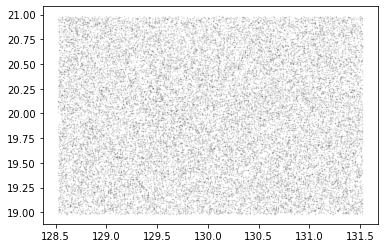

In [208]:
plt.plot(data0['ra'], data0['dec'], '.', color='k', alpha = 0.1, ms=1)

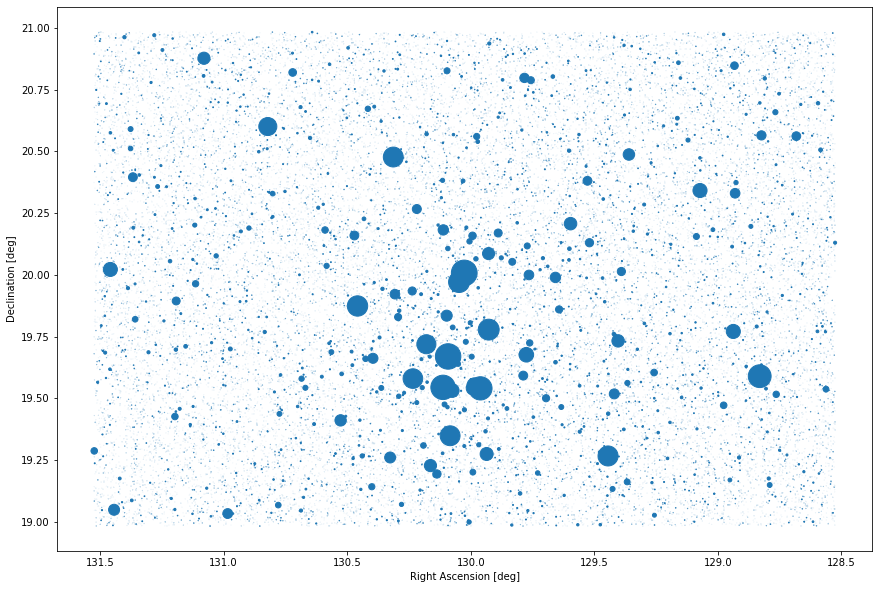

In [209]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.scatter(data0['ra'], data0['dec'], s=data0['phot_g_mean_flux']/1e5);
ax.set_aspect('equal')

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');

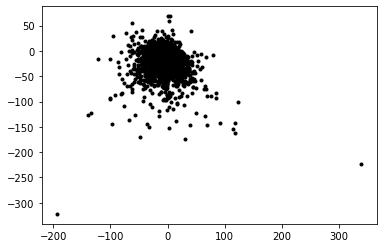

In [210]:
plt.plot(data0['pmra'], data0['pmdec'], marker='.', ls='', color='k');

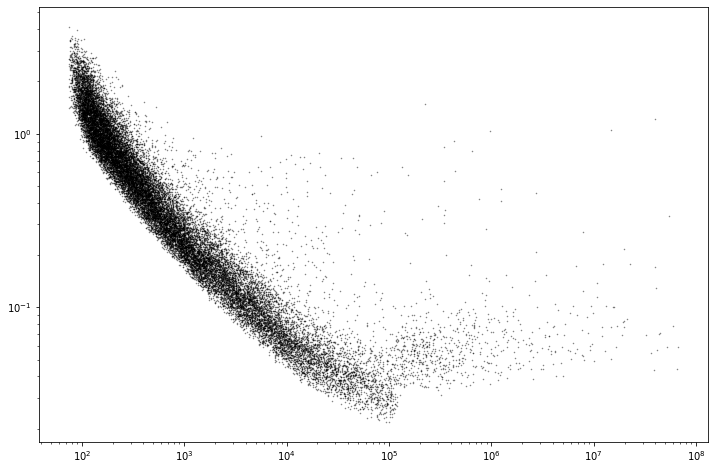

In [211]:
fig, ax = plt.subplots(ncols=1, figsize=(12,8))
ax.plot(data0['phot_g_mean_flux'], data0['parallax_error'], '.k', ms=1, alpha=0.5)
ax.loglog();

Never forget to add labels to identify what you are plotting!

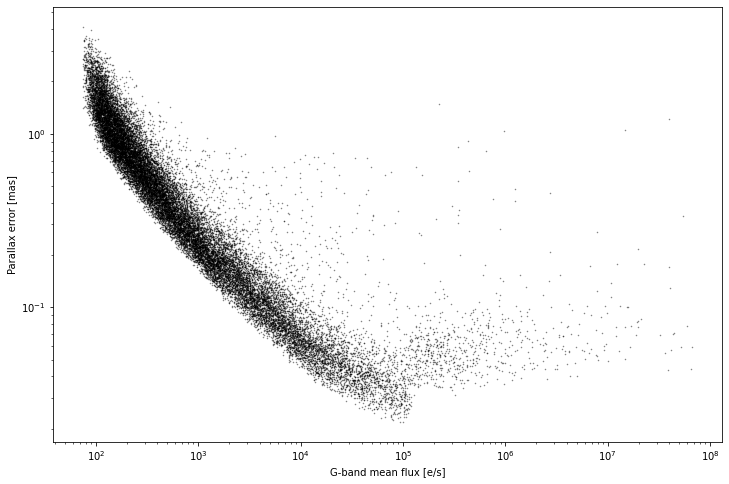

In [212]:
fig, ax = plt.subplots(ncols=1, figsize=(12,8))
with quantity_support():
    ax.plot(data0['phot_g_mean_flux'], data0['parallax_error'], '.k', ms=1, alpha=0.5)
ax.loglog()

ax.set_xlabel('G-band mean flux [e/s]')
ax.set_ylabel('Parallax error [mas]');

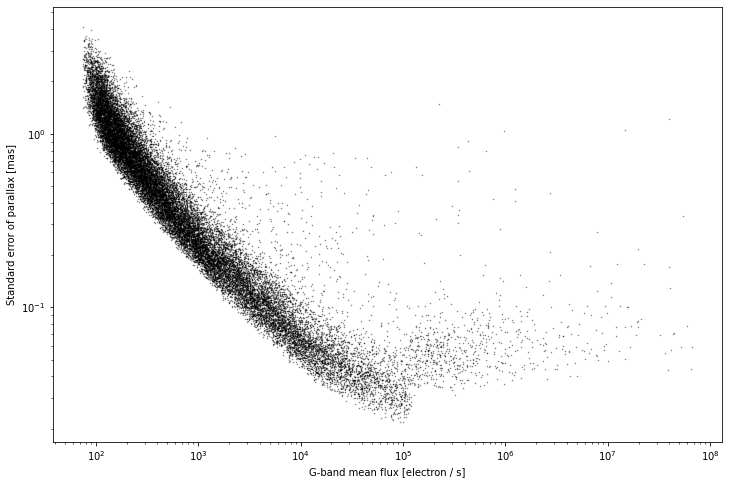

In [213]:
fig, ax = plt.subplots(ncols=1, figsize=(12,8))
col1 = 'phot_g_mean_flux'
col2 = 'parallax_error'

col1_unit = data0[col1].info(out=None)['unit']
col1_description = data0[col1].info(out=None)['description']

col2_unit = data0[col2].info(out=None)['unit']
col2_description = data0[col2].info(out=None)['description']

ax.plot(data0[col1], data0[col2], '.k', ms=1, alpha=0.5)

ax.loglog()

ax.set_xlabel(f"{col1_description} [{col1_unit}]")
ax.set_ylabel(f"{col2_description} [{col2_unit}]");

In [217]:
def plot_variables(data, col1, col2, loglog=True, **kwargs):
    fig, ax = plt.subplots(ncols=1, figsize=(12,8))

    col1_unit = data[col1].info(out=None)['unit']
    col1_description = data0[col1].info(out=None)['description']

    col2_unit = data[col2].info(out=None)['unit']
    col2_description = data[col2].info(out=None)['description']

    ax.plot(data[col1], data[col2], **kwargs)
    if loglog:
        ax.loglog()
    ax.set_xlabel(f"{col1_description} [{col1_unit}]")
    ax.set_ylabel(f"{col2_description} [{col2_unit}]")
    return fig, ax

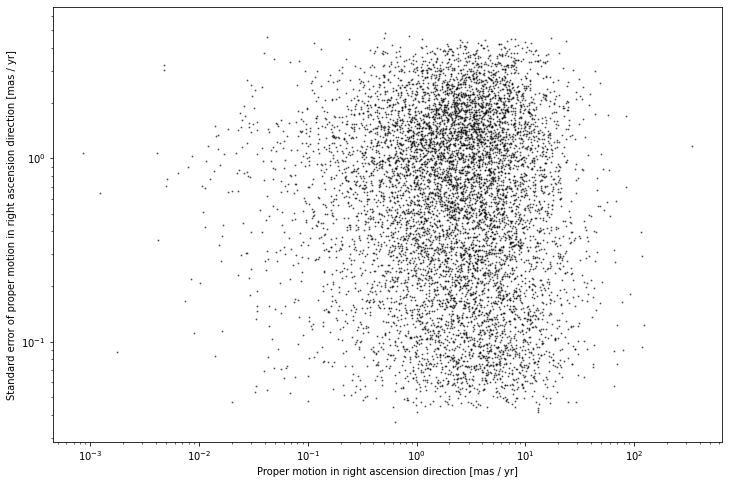

In [218]:
fig, ax = plot_variables(data0, col1='pmra', col2='pmra_error', marker='.', color='k', ms=2, alpha=0.5, ls='')

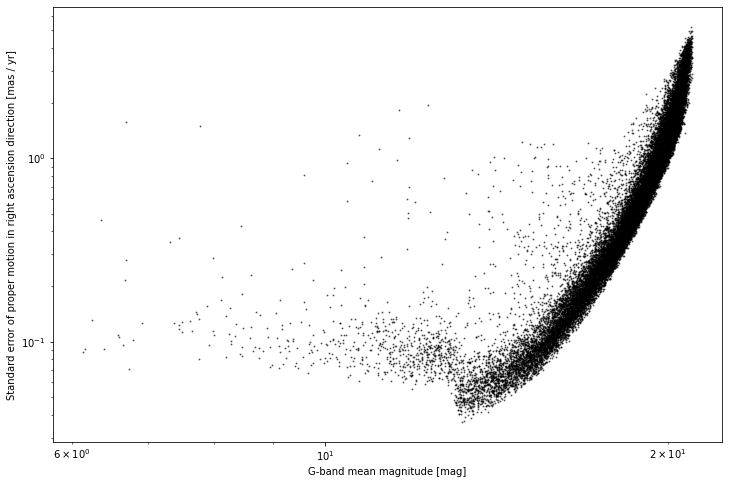

In [219]:
fig, ax = plot_variables(data0, col1='phot_g_mean_mag', col2='pmra_error', marker='.', color='k', ms=2, alpha=0.5, ls='')

### 🌪 Exercise
Define a fucntion similar to `plot_variables` that can be used to plot 3 columns against each other in three different subplots.

## Coordinate plots in sky projections

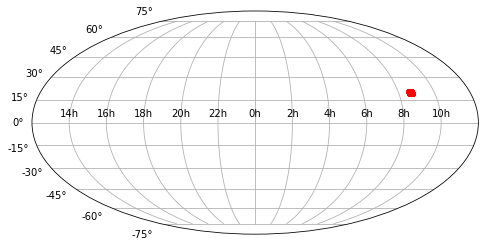

In [224]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(data0['ra'].to(u.radian), data0['dec'].to(u.radian), marker='.', color='r')
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

Let's overplot the galactic plane

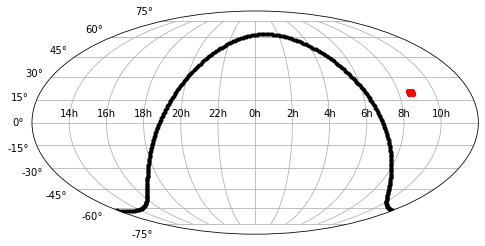

In [226]:
galactic_plane = SkyCoord(l=np.arange(-180, 180), b=np.zeros(360), frame='galactic', unit=u.deg)
galactic_plane_eq = galactic_plane.transform_to('icrs')
gal_ra  = galactic_plane_eq.ra.wrap_at('180d').radian
gal_dec = galactic_plane_eq.dec.wrap_at('180d').radian

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(data0['ra'].to(u.radian), data0['dec'].to(u.radian), marker='.', color='r')
plt.plot(gal_ra, gal_dec, 'k.')
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

### 🌪 Exercise
Make the previous plot but in Galactic coordinates

### 🌪 Exercise
Prepare a plot `pmra` vs `pmdec` including errorbars using the matplotlib function `plt.errorbars`. The key point is to remove NaNs from the table. Spoiler alert: there is no easy way to do this in astropy `Table`, apparently, since [this PR](https://github.com/astropy/astropy/issues/7446) was never finished.

(-50.0, 50.0)

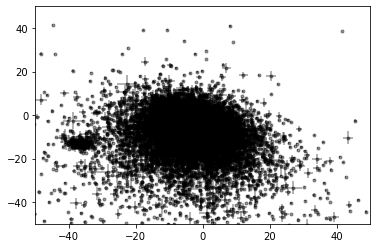

In [227]:
# Astropy doesn't seem to have an easy way to remove rows with NaNs https://github.com/astropy/astropy/issues/7446
# I will use a bad trick of converting to pandas. Note we lose units information!
pm = data0[['pmra','pmdec','pmra_error', 'pmdec_error']]
pm = Table.from_pandas(pm.to_pandas().dropna())

plt.errorbar(pm['pmra'], pm['pmdec'],
             yerr=pm['pmra_error'],
             xerr=pm['pmdec_error'],
             marker='.', ls='', color='k', alpha=0.4)
plt.xlim(-50, 50)
plt.ylim(-50, 50)

## Histogram distributions

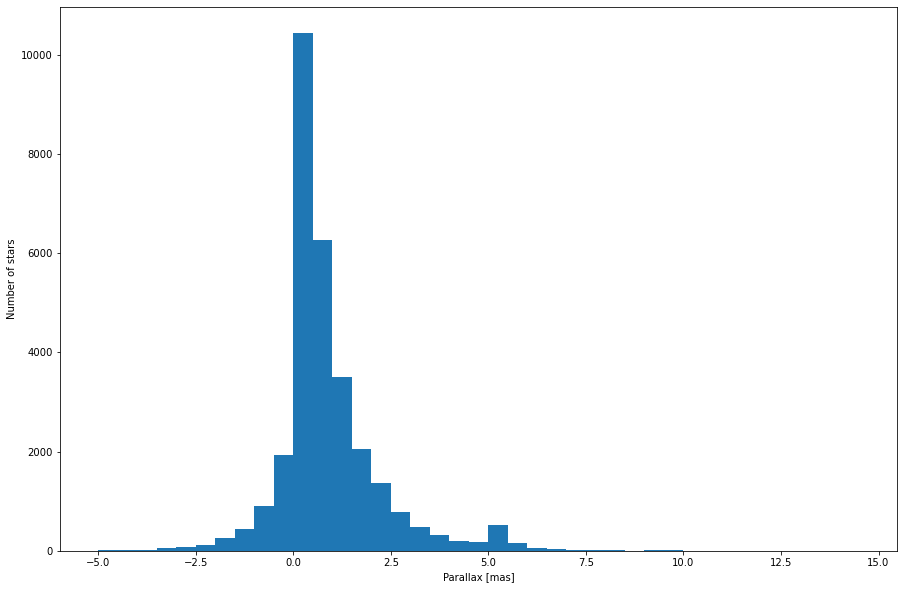

In [228]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.hist(data0['parallax'], bins=np.arange(-5, 15, 0.5))

ax.set_xlabel('Parallax [mas]')
ax.set_ylabel('Number of stars');

### ⛏ Exercise
Modify the line `ax.set_xlabel('Parallax [mas]')` to automatically find the units of the column being plotted.

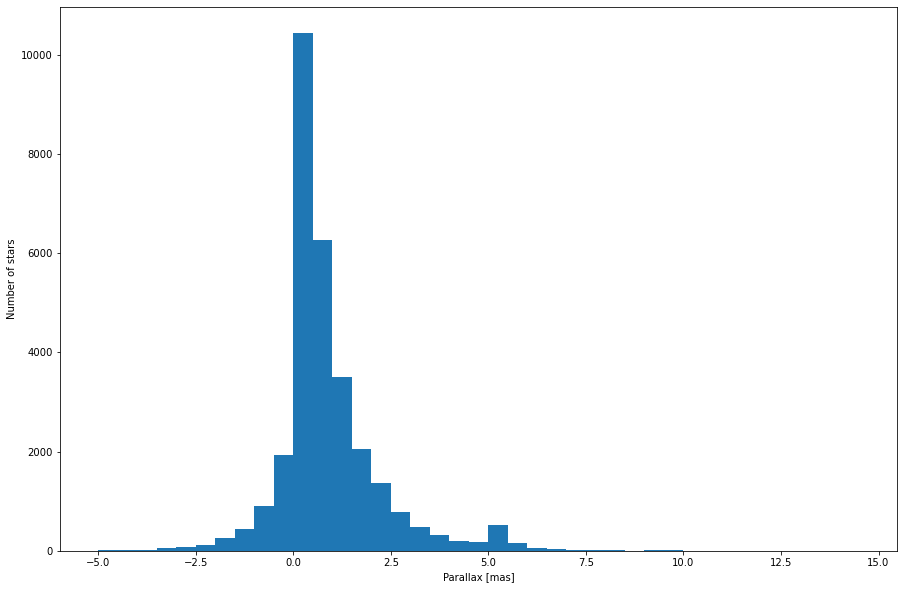

In [229]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))

ax.hist(data0['parallax'], bins=np.arange(-5, 15, 0.5))

description = data0['parallax'].info(out=None)['description']
unit = data0['parallax'].info(out=None)['unit']
ax.set_xlabel(f"{description} [{unit}]")
ax.set_ylabel('Number of stars');

First of all we see that there are negative parallaxes, which don't have physical meaning, but are a consequence of errors in the parallax determination. We can create a second `QTable` that ignores any negative parallax


In [230]:
positive_parallaxes = data0['parallax'] > 0
data1 = Table(data0[positive_parallaxes])
print(len(data0))
print(len(data1))

30330
21475


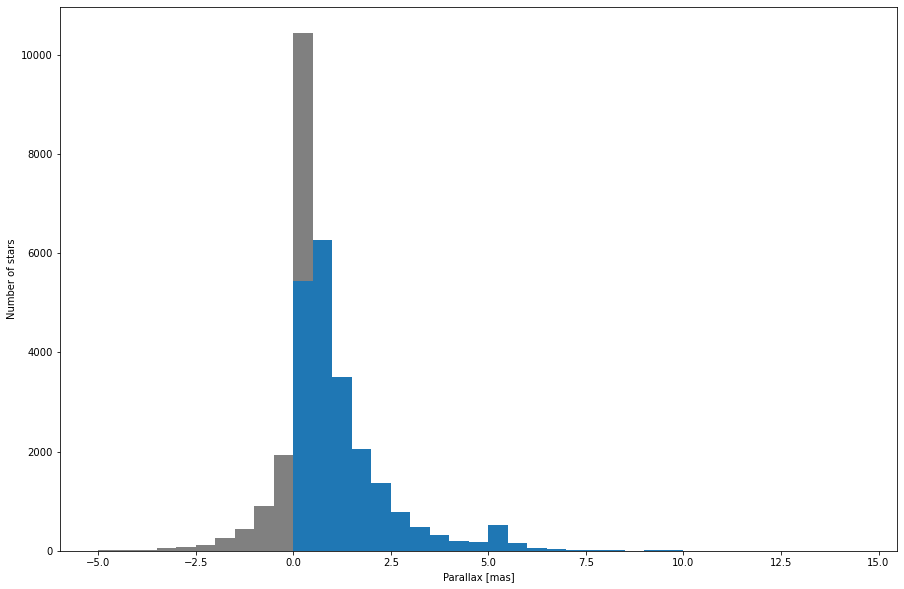

In [231]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.hist(data0['parallax'], bins=np.arange(-5, 15, 0.5), color='grey')
ax.hist(data1['parallax'], bins=np.arange(-5, 15, 0.5))
    
description = data0['parallax'].info(out=None)['description']
unit = data0['parallax'].info(out=None)['unit']
ax.set_xlabel(f"{description} [{unit}]")
ax.set_ylabel('Number of stars');

Let's work with distances in kpc, that are more familiar to us. We will use an astropy unit transformation as before. However, an angle (mas) cannot be converted to distance (kpc) without knowing how the transformation should occur. We need to parse which equivalency to use to make the transormation.

There is a lot of information in [Equivalencies](https://docs.astropy.org/en/stable/units/equivalencies.html), for example to convert spectral units (nm to Hz) or conversions from wavelength/frequency/energy including doppler effect.

In [232]:
data1['distance'] = data1['parallax'].to(u.kpc, equivalencies=u.parallax())
data1[0:3]

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,distance
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,kpc
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64
0.009802111759292364,1635721458409799680,Gaia DR2 661322846442390784,661322846442390784,390503307,2015.5,130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,0.828727295033905,0.3350012064562093,2.473804,-4.033231570564601,0.49627960158587475,2.915715928312259,0.33009256613751603,-0.31987226,-0.044802926,-0.18101314,0.28448436,-0.21131124,0.06778818,-0.43846372,0.5705786,-0.209052,-0.29190946,152,0,143,9,0.2536221,141.57729,0.2887893752683439,0.2976614313509744,31,False,0.41604915,1.4433653233017025,0.055630092831848624,0.0069499817,18,11,0.4772171,0,24,False,196,667.7619710548339,2.35694090385261,283.31723,18.626812,21,277.9334255388577,10.65346573347537,26.088545,19.241537,22,720.0270197973655,14.947795683432332,48.169445,17.618547,1.4944853,0,1.6229897,0.6147251,1.0082645,--,--,0,--,--,--,NOT_AVAILABLE,205.53752569203553,32.51753674558407,127.19356700248548,1.5582862225577503,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661322846442390784,1.2066695594466788
0.013413931870679088,1635721458409799680,Gaia DR2 661322953818940160,661322953818940160,350513172,2015.5,130.01602099428743,0.10531691756732188,19.993747198922243,0.06883691544492751,0.427351108527

### ⛏ Exercise
Compute yourself the distance in kpc and check that the transformation has worked. Start by using the numpy array without units `np.array(data1['parallax'])` and transform it with the parallax formula $d [{\rm kpc}]= \frac{1}{p[{\rm mas}]}$, where $p$ is the parallax.

In [240]:
# We compute the ditance as 1/parallax. When the parallax is in mas, the distance will be in kpc.
p = np.array(data1['parallax']) # Let's get rid of the units because we want to do the conversion manually
d = 1./p
d_kpc = u.Quantity(d, unit='kpc') # Now we set the correct units back
print(f"Astropy distances: {data1['distance'].data}")
print(f"My distances: {d_kpc}")

# We compute how different are the astropy parallax from equivalence and our manually computed distances:
residual = data1['distance'] - d_kpc
print(f"Mean residual {np.nanmean(residual)}")

Astropy distances: [1.20666956 2.33999627 0.64033658 ... 0.26994928 3.44074008 0.6831425 ]
My distances: [1.20666956 2.33999627 0.64033658 ... 0.26994928 3.44074008 0.6831425 ] kpc
Mean residual -3.4149148390706145e-16 kpc


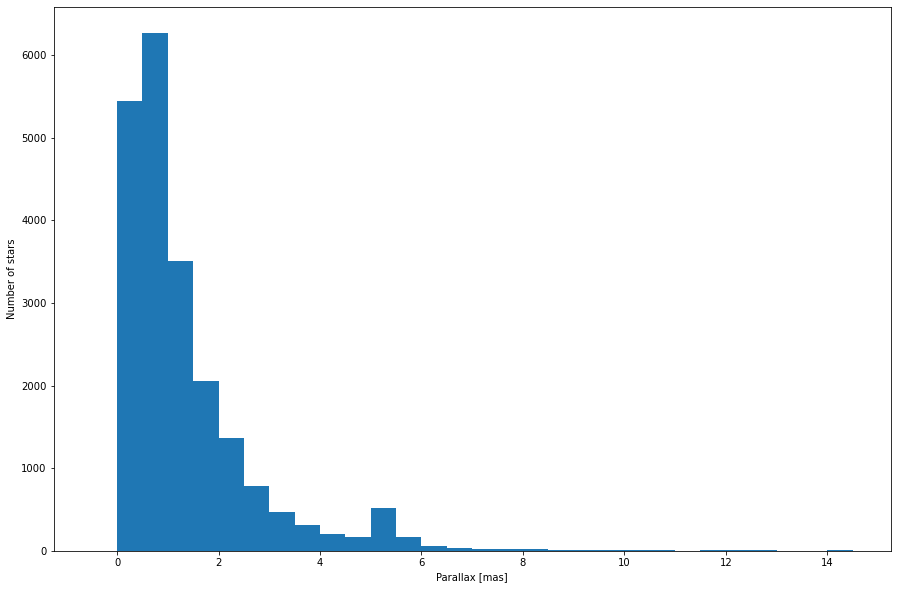

In [241]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
with quantity_support():
    ax.hist(data1['parallax'], bins=np.arange(-0.5, 15, 0.5))
    
description = data0['parallax'].info(out=None)['description']
unit = data0['parallax'].info(out=None)['unit']
ax.set_xlabel(f"{description} [{unit}]")
ax.set_ylabel('Number of stars');

Now we are going to use a finer bin resolution and plot two panels to visualize the parallax and the distance at the same time.

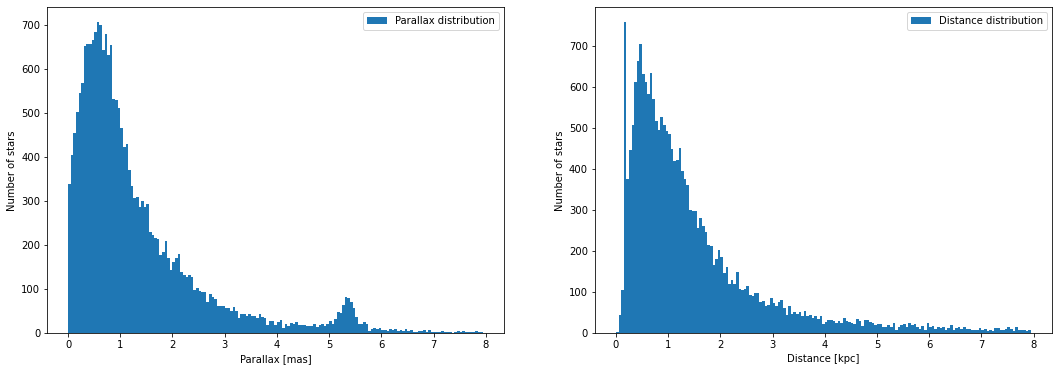

In [242]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))
with quantity_support():
    ax[0].hist(data1['parallax'], bins=np.arange(0, 8, 0.05), label='Parallax distribution')
    ax[1].hist(data1['distance'], bins=np.arange(0, 8, 0.05), label='Distance distribution') # Try 0.01 kpc steps

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Parallax [mas]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Distance [kpc]')
ax[1].set_ylabel('Number of stars');

We see a very interesting accummulation of stars at a parallax of approximately 5.2 mas. We can create a filter to select the start in that particular range. We will overplot the distribution of the whole sample and the one of the selected group.

In [278]:
manual_filter1 = (data1['parallax'] > 5.0*u.mas) & (data1['parallax'] < 5.7*u.mas)
cluster1 = data1[manual_filter1]
cluster1

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,distance,cluster
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,kpc,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64,bool
0.02445630792133449,1635721458409799680,Gaia DR2 661324431287688448,661324431287688448,788166040,2015.5,130.02657947132394,0.043558763357000686,20.00773569688166,0.03099984816650081,5.316194371046439,0.05892472792863759,90.22009,-35.60957552754509,0.08754513933765422,-11.963702152166118,0.055136721474611516,-0.41975328,-0.1358385,-0.22184417,0.4538053,-0.111287355,0.215826,-0.48650834,0.62542593,-0.25465265,-0.3871421,220,220,212,8,7.091365,386.3978,0.0,0.0,31,True,316.96573,1.5727062771431164,0.009477604151890891,-0.008497519,25,12,0.056965407,0,37,False,291,66232823.59961401,20482.763922214683,3233.5881,6.1356826,29,30612233.464896858,50147.45191680208,610.44446,6.6366506,29,49206886.48189549,95742.81356889517,513.9486,5.531855,1.2051294,0,1.1047955,0.500968,0.6038275,34.1410282196341,0.14830496348234412,13,5000.0,2.5,0.25,NOT_AVAILABLE,205.51166437920656,32.53709222672014,127.1971240804592,1.5873587768058746,100001,5047.947,4981.25,5098.27,--,--,--,--,--,--,200111,13.151215,12.892875,13.505751,101.17787,99.69645,102.659294,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661324431287688448,0.18810448418633724,True
0.02447974121342088,1635721458409799680,Gaia DR2 661322060465742336,661322060465742336,1182878022,201

Theres is an alternative way to deal with this problem, and it is to create a new column that can be True if the star is part of the cluster of False if not

In [281]:
data1['cluster'] = manual_filter1
data1[0:3]

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,distance,cluster
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,kpc,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64,bool
0.009802111759292364,1635721458409799680,Gaia DR2 661322846442390784,661322846442390784,390503307,2015.5,130.01500503419462,0.24888120916348072,19.980541000468566,0.193851471702074,0.828727295033905,0.3350012064562093,2.473804,-4.033231570564601,0.49627960158587475,2.915715928312259,0.33009256613751603,-0.31987226,-0.044802926,-0.18101314,0.28448436,-0.21131124,0.06778818,-0.43846372,0.5705786,-0.209052,-0.29190946,152,0,143,9,0.2536221,141.57729,0.2887893752683439,0.2976614313509744,31,False,0.41604915,1.4433653233017025,0.055630092831848624,0.0069499817,18,11,0.4772171,0,24,False,196,667.7619710548339,2.35694090385261,283.31723,18.626812,21,277.9334255388577,10.65346573347537,26.088545,19.241537,22,720.0270197973655,14.947795683432332,48.169445,17.618547,1.4944853,0,1.6229897,0.6147251,1.0082645,--,--,0,--,--,--,NOT_AVAILABLE,205.53752569203553,32.51753674558407,127.19356700248548,1.5582862225577503,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661322846442390784,1.2066695594466788,False
0.013413931870679088,1635721458409799680,Gaia DR2 661322953818940160,661322953818940160,350513172,2015.5,130.01602099428743,0.10531691756732188,19.993747198922243,0.068836915444

The cluster is simply selecting the rows matching the filter = selecting the true values

In [282]:
data1[manual_filter1]

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,distance,cluster
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,kpc,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64,bool
0.02445630792133449,1635721458409799680,Gaia DR2 661324431287688448,661324431287688448,788166040,2015.5,130.02657947132394,0.043558763357000686,20.00773569688166,0.03099984816650081,5.316194371046439,0.05892472792863759,90.22009,-35.60957552754509,0.08754513933765422,-11.963702152166118,0.055136721474611516,-0.41975328,-0.1358385,-0.22184417,0.4538053,-0.111287355,0.215826,-0.48650834,0.62542593,-0.25465265,-0.3871421,220,220,212,8,7.091365,386.3978,0.0,0.0,31,True,316.96573,1.5727062771431164,0.009477604151890891,-0.008497519,25,12,0.056965407,0,37,False,291,66232823.59961401,20482.763922214683,3233.5881,6.1356826,29,30612233.464896858,50147.45191680208,610.44446,6.6366506,29,49206886.48189549,95742.81356889517,513.9486,5.531855,1.2051294,0,1.1047955,0.500968,0.6038275,34.1410282196341,0.14830496348234412,13,5000.0,2.5,0.25,NOT_AVAILABLE,205.51166437920656,32.53709222672014,127.1971240804592,1.5873587768058746,100001,5047.947,4981.25,5098.27,--,--,--,--,--,--,200111,13.151215,12.892875,13.505751,101.17787,99.69645,102.659294,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+661324431287688448,0.18810448418633724,True
0.02447974121342088,1635721458409799680,Gaia DR2 661322060465742336,661322060465742336,1182878022,201

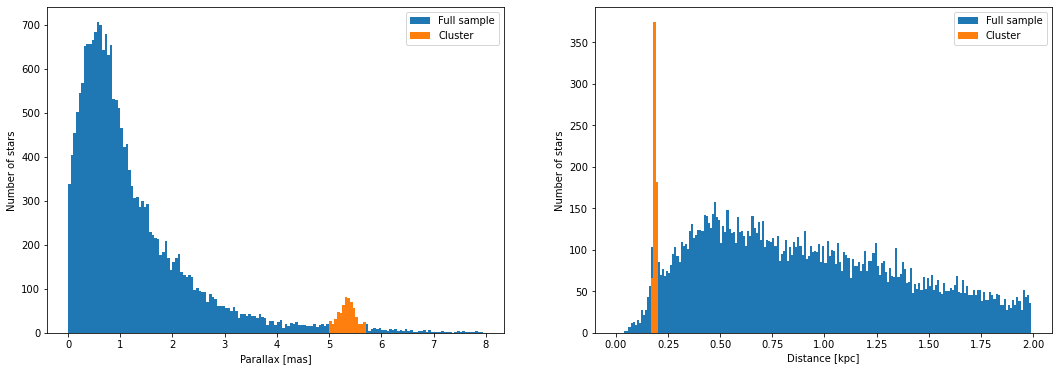

In [244]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))
with quantity_support():
    ax[0].hist(data1['parallax'],    bins=np.arange(0, 8, 0.05), label='Full sample')
    ax[0].hist(cluster1['parallax'], bins=np.arange(0, 8, 0.05), label='Cluster')

    ax[1].hist(data1['distance'],    bins=np.arange(0, 2, 0.01), label='Full sample')
    ax[1].hist(cluster1['distance'], bins=np.arange(0, 2, 0.01), label='Cluster')

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Parallax [mas]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Distance [kpc]')
ax[1].set_ylabel('Number of stars');

ax[0].legend()
ax[1].legend();

## Spatial distribution of the cluster
We plot the distribution of start in the sky. First, all the stars in the sample are plotted in grey. The stars of the cluster and plotted in color, with the colorscale representing the distance from the Earth in pc.

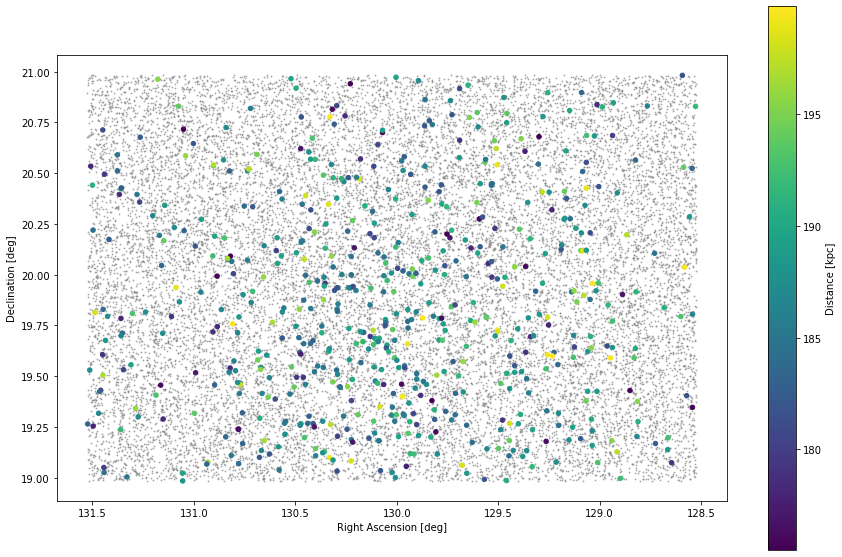

In [246]:
fig, ax = plt.subplots(ncols=1, figsize=(15,10))
ax.set_aspect('equal')

ax.scatter(data1['ra'], data1['dec'], c='gray', s=1, alpha=0.5);
l = ax.scatter(cluster1['ra'], cluster1['dec'], c=cluster1['distance']*1000., s=20);

ax.set_xlabel('Right Ascension [deg]')
ax.set_ylabel('Declination [deg]');

# Here we invert the direction of the right ascension axis
ax.invert_xaxis()

# Show the color bar
cb = fig.colorbar(l);
cb.set_label('Distance [kpc]')

There is no apparent pattern of the selected stars, and they don't seem to cluster in a particular region, although there seems to be an overdensity at the center, specially in Right Ascension.

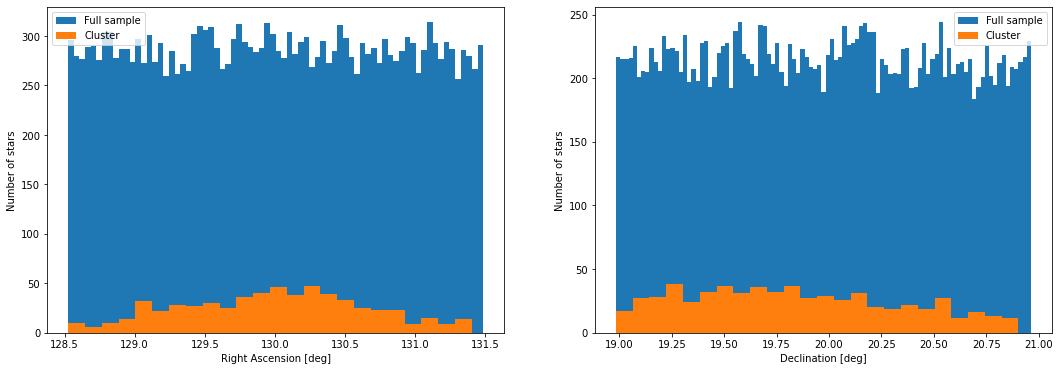

In [258]:
fig, ax = plt.subplots(ncols=2, figsize=(18,6))

ra_range = [np.min(data1['ra']), np.max(data1['ra'])]
de_range = [np.min(data1['dec']), np.max(data1['dec'])]
                   
                                       
ax[0].hist(data1['ra'],    bins=np.arange(ra_range[0], ra_range[1], 0.04), label='Full sample')
ax[0].hist(cluster1['ra'], bins=np.arange(ra_range[0], ra_range[1], 0.12), label='Cluster')

ax[1].hist(data1['dec'],    bins=np.arange(de_range[0], de_range[1], 0.02), label='Full sample')
ax[1].hist(cluster1['dec'], bins=np.arange(de_range[0], de_range[1], 0.08), label='Cluster')

ax[0].set_xlabel('Right Ascension [deg]')
ax[0].set_ylabel('Number of stars');
ax[1].set_xlabel('Declination [deg]')
ax[1].set_ylabel('Number of stars');

ax[0].legend()
ax[1].legend();

Nothing obvious or much interesting. The overdensity in the centre for R.A. is clear, but in Dec it is not clear, there may be a slope.

# Pandas tables

In [259]:
df1 = data1.to_pandas()
df1

,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,distance
0,0.009802,1635721458409799680,Gaia DR2 661322846442390784,661322846442390784,390503307,2015.5,130.015005,0.248881,19.980541,0.193851,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,1.206670
1,0.013414,1635721458409799680,Gaia DR2 661322953818940160,661322953818940160,350513172,2015.5,130.016021,0.105317,19.993747,0.068837,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,2.339996
2,0.017763,1635721458409799680,Gaia DR2 661322129182111232,661322129182111232,1348785594,2015.5,130.039527,0.494142,19.971954,0.369152,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,0.640337
3,0.018220,1635721458409799680,Gaia DR2 661322090528141568,661322090528141568,1417274752,2015.5,130.021480,0.255773,19.965408,0.176424,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,1.767543
4,0.023270,1635721458409799680,Gaia DR2 661323606650853632,661323606650853632,1478051041,2015.5,130.049762,0.399135,19.983778,0.288447,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,2.104524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21470,1.709310,1635721458409799680,Gaia DR2 661860443204517376,661860443204517376,348898792,2015.5,131.522058,0.099313,20.960466,0.065762,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,3.463295
21471,1.711455,1635721458409799680,Gaia DR2 662738742540602112,662738742540602112,1262203189,2015.5,128.533398,1.104301,19.007587,0.622089,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,4.194388
21472,1.714185,1635721458409799680,Gaia DR2 664686428606701952,664686428606701952,501720672,2015.5,128.535230,0.028887,20.978715,0.018370,...,0.0867,200111,0.597620,0.558482,0.618193,0.175373,0.171498,0.179248,https://gea.esac.esa.int/data-server/datalink/...,0.269949
21473,1.717709,1635721458409799680,Gaia DR2 662738643758017536,662738643758017536,390421460,2015.5,128.528345,0.534061,19.003505,0.307096,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,3.440740


The first thing we see is that we have lost the unit information. That is an important problem if we don't track the column operations properly.

In [270]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21475 entries, 0 to 21474
Data columns (total 97 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dist                              21475 non-null  float64
 1   solution_id                       21475 non-null  int64  
 2   DESIGNATION                       21475 non-null  object 
 3   source_id                         21475 non-null  int64  
 4   random_index                      21475 non-null  int64  
 5   ref_epoch                         21475 non-null  float64
 6   ra                                21475 non-null  float64
 7   ra_error                          21475 non-null  float64
 8   dec                               21475 non-null  float64
 9   dec_error                         21475 non-null  float64
 10  parallax                          21475 non-null  float64
 11  parallax_error                    21475 non-null  float64
 12  para

In [268]:
df1.columns

Index(['dist', 'solution_id', 'DESIGNATION', 'source_id', 'random_index',
       'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr',
       'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator_objec

We can easily do operations to columns. First by aggregating values according to some functions

In [263]:
df1.aggregate(['sum', 'min'])

,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,distance
sum,19843.797827,4517603007461851136,Gaia DR2 661322846442390784Gaia DR2 6613229538...,6120742208307241728,18195852353695,43282862.5,2.792198e+06,8024.371191,429010.505126,4921.175491,...,1328.970703,864079298,6035.442383,5533.554688,6427.920410,17878.617188,15619.746094,20137.488281,https://gea.esac.esa.int/data-server/datalink/...,74268.185980
min,0.009802,1635721458409799680,Gaia DR2 659698146213460864,659698146213460864,19969,2015.5,1.285250e+02,0.018194,18.983352,0.011679,...,0.007100,200111,0.500969,0.313949,0.513331,0.030905,0.030151,0.031660,https://gea.esac.esa.int/data-server/datalink/...,0.042778


In [265]:
df1.aggregate({'ra' : ['mean', 'min', 'max', 'std'],
               'dec' : ['mean', 'min', 'max', 'std'],
               'parallax': 'std'})

,ra,dec,parallax
mean,130.020884,19.977206,NaN
min,128.525007,18.983352,NaN
max,131.524907,20.983283,NaN
std,0.862860,0.574344,1.419173


In [266]:
df1.describe()

,dist,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
count,21475.000000,2.147500e+04,2.147500e+04,2.147500e+04,21475.0,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,...,5053.000000,5053.000000,4318.0,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,21475.000000
mean,0.924042,1.635721e+18,6.625639e+17,8.473040e+08,2015.5,130.020884,0.373661,19.977206,0.229158,1.352400,...,0.097710,0.263006,200111.0,1.397737,1.281508,1.488632,4.140487,3.617354,4.663610,3.458356
std,0.365510,0.000000e+00,1.564897e+15,4.905625e+08,0.0,0.862860,0.398041,0.574344,0.241998,1.419173,...,0.141129,0.213469,0.0,3.233030,2.986711,3.329458,44.876495,40.223816,49.658020,33.809103
min,0.009802,1.635721e+18,6.596981e+17,1.996900e+04,2015.5,128.525007,0.018194,18.983352,0.011679,0.000325,...,0.000000,0.007100,200111.0,0.500969,0.313949,0.513331,0.030905,0.030151,0.031660,0.042778
25%,0.655339,1.635721e+18,6.612660e+17,4.192382e+08,2015.5,129.277745,0.084699,19.484359,0.053048,0.495220,...,0.007900,0.107100,200111.0,0.720208,0.648146,0.763561,0.256345,0.214092,0.296318,0.593978
50%,0.947552,1.635721e+18,6.618318e+17,8.447739e+08,2015.5,130.017273,0.222229,19.980902,0.137585,0.905909,...,0.041700,0.200700,200111.0,0.937876,0.855817,1.002790,0.667259,0.584672,0.758724,1.103863
75%,1.209653,1.635721e+18,6.643890e+17,1.277870e+09,2015.5,130.769064,0.534045,20.471576,0.329299,1.683563,...,0.125500,0.351800,200111.0,1.269365,1.156431,1.379006,1.830126,1.586210,2.058991,2.019306
max,1.724373,1.635721e+18,6.648629e+17,1.692899e+09,2015.5,131.524907,3.238878,20.983283,2.461208,23.376402,...,1.238700,1.553000,200111.0,150.389877,136.227798,151.835205,2420.168213,2245.128906,2595.207520,3075.737473


In [269]:
def my_func(row):
    return np.sqrt(row['pmra']**2 + row['pmdec']**2)

df1.apply(lambda row: my_func(row), axis=1)

0         4.976782
1         3.819113
2         6.473050
3         5.183002
4         4.453820
           ...    
21470     3.903989
21471    12.139889
21472     4.747764
21473     2.679700
21474    24.481405
Length: 21475, dtype: float64

Other cases
- pivot tables
- very powerful groupby
- Complex conditions involving multiple columns

In [284]:
import pandas as pd

[]

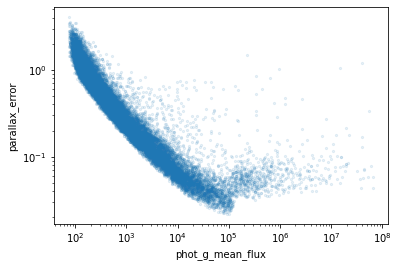

In [317]:
df1.plot.scatter(x='phot_g_mean_flux', y='parallax_error', marker='.', alpha=0.1)
plt.loglog()

[]

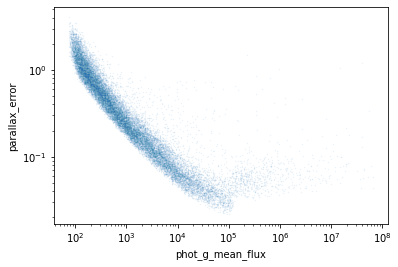

In [329]:
df1.plot.scatter(x='phot_g_mean_flux', y='parallax_error',  marker='.', s=0.5, alpha=0.1)
plt.loglog()

In [ ]:
ax.plot(data0['phot_g_mean_flux'], data0['parallax_error'], '.k', ms=1, alpha=0.5)


<AxesSubplot:ylabel='Frequency'>

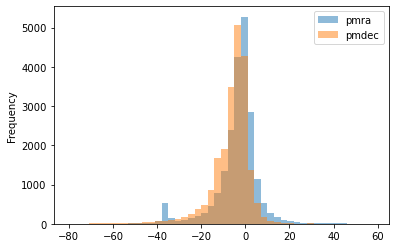

In [302]:
df2 = df1.groupby(pd.cut(df1['parallax'], np.arange(0, 8, 1.0)))
df1[['pmra','pmdec']].plot.hist(bins=np.arange(-80, 60, 3), alpha=0.5)


<AxesSubplot:>

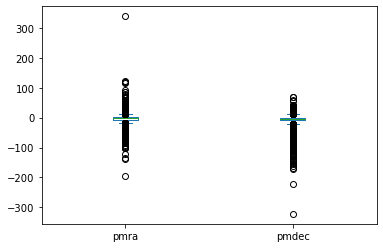

In [305]:
df1[['pmra','pmdec']].plot.box()